In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(7992)


1. Initialization and Data Exploration (Total 5 Points)

In [3]:
#  Load the dataset. (0.5 x 2) 
g08_online_shopping_df = pd.read_csv("/Users/Ahmed/Documents/Dsan6700/Assignment 01/online_shoppers_intention.csv")

In [4]:
#  Show the first 6 data points using head(). (0.5 x 2) 
g08_online_shopping_df.head(6) # Shows the first 6 rows of the dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [5]:
#  Describe the pandas Dataframe by using describe. (0.5 x 2) 
g08_online_shopping_df.describe() # Provides more information about the dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


/var/folders/0c/_j1ll_6n7d7bj4mb67cyr3g80000gn/T/ipykernel_13024/1209834990.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = g08_online_shopping_df.corr()


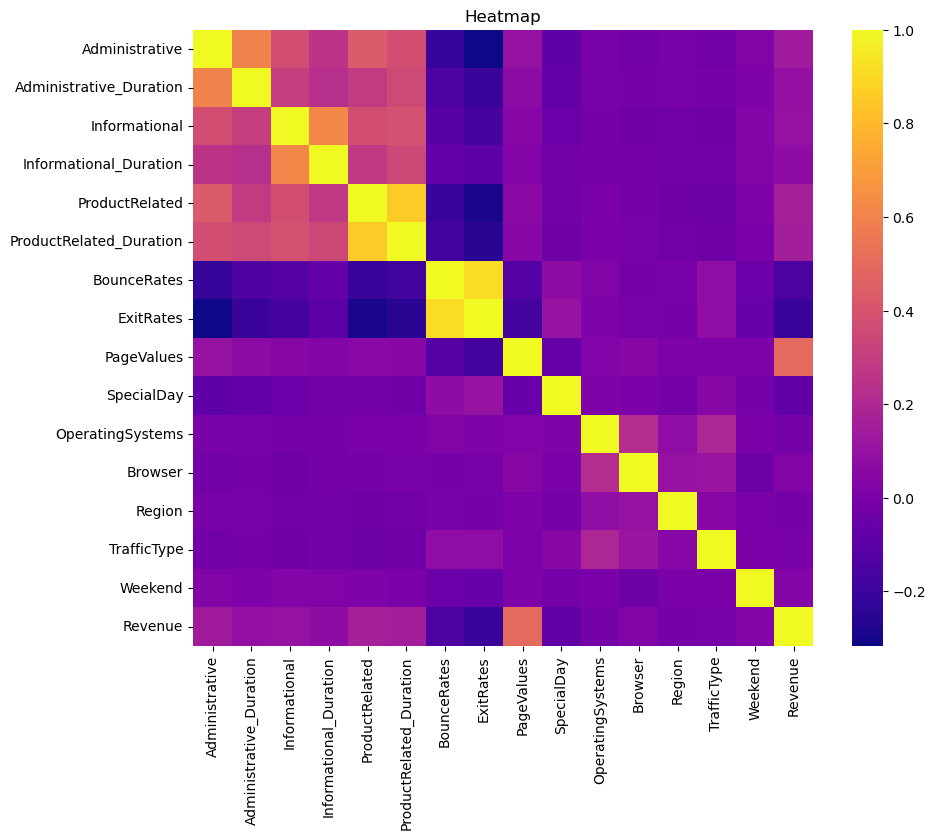

In [6]:
# Show a correlation heat plot of the entire dataset using matplotlib and sns, and choose any color palette (except blue) you like and experiment. (0.5 x 2) 

# Calculate the correlation matrix
correlation_matrix = g08_online_shopping_df.corr()

# Heat map
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'plasma').set(title = 'Heatmap')
plt.show()

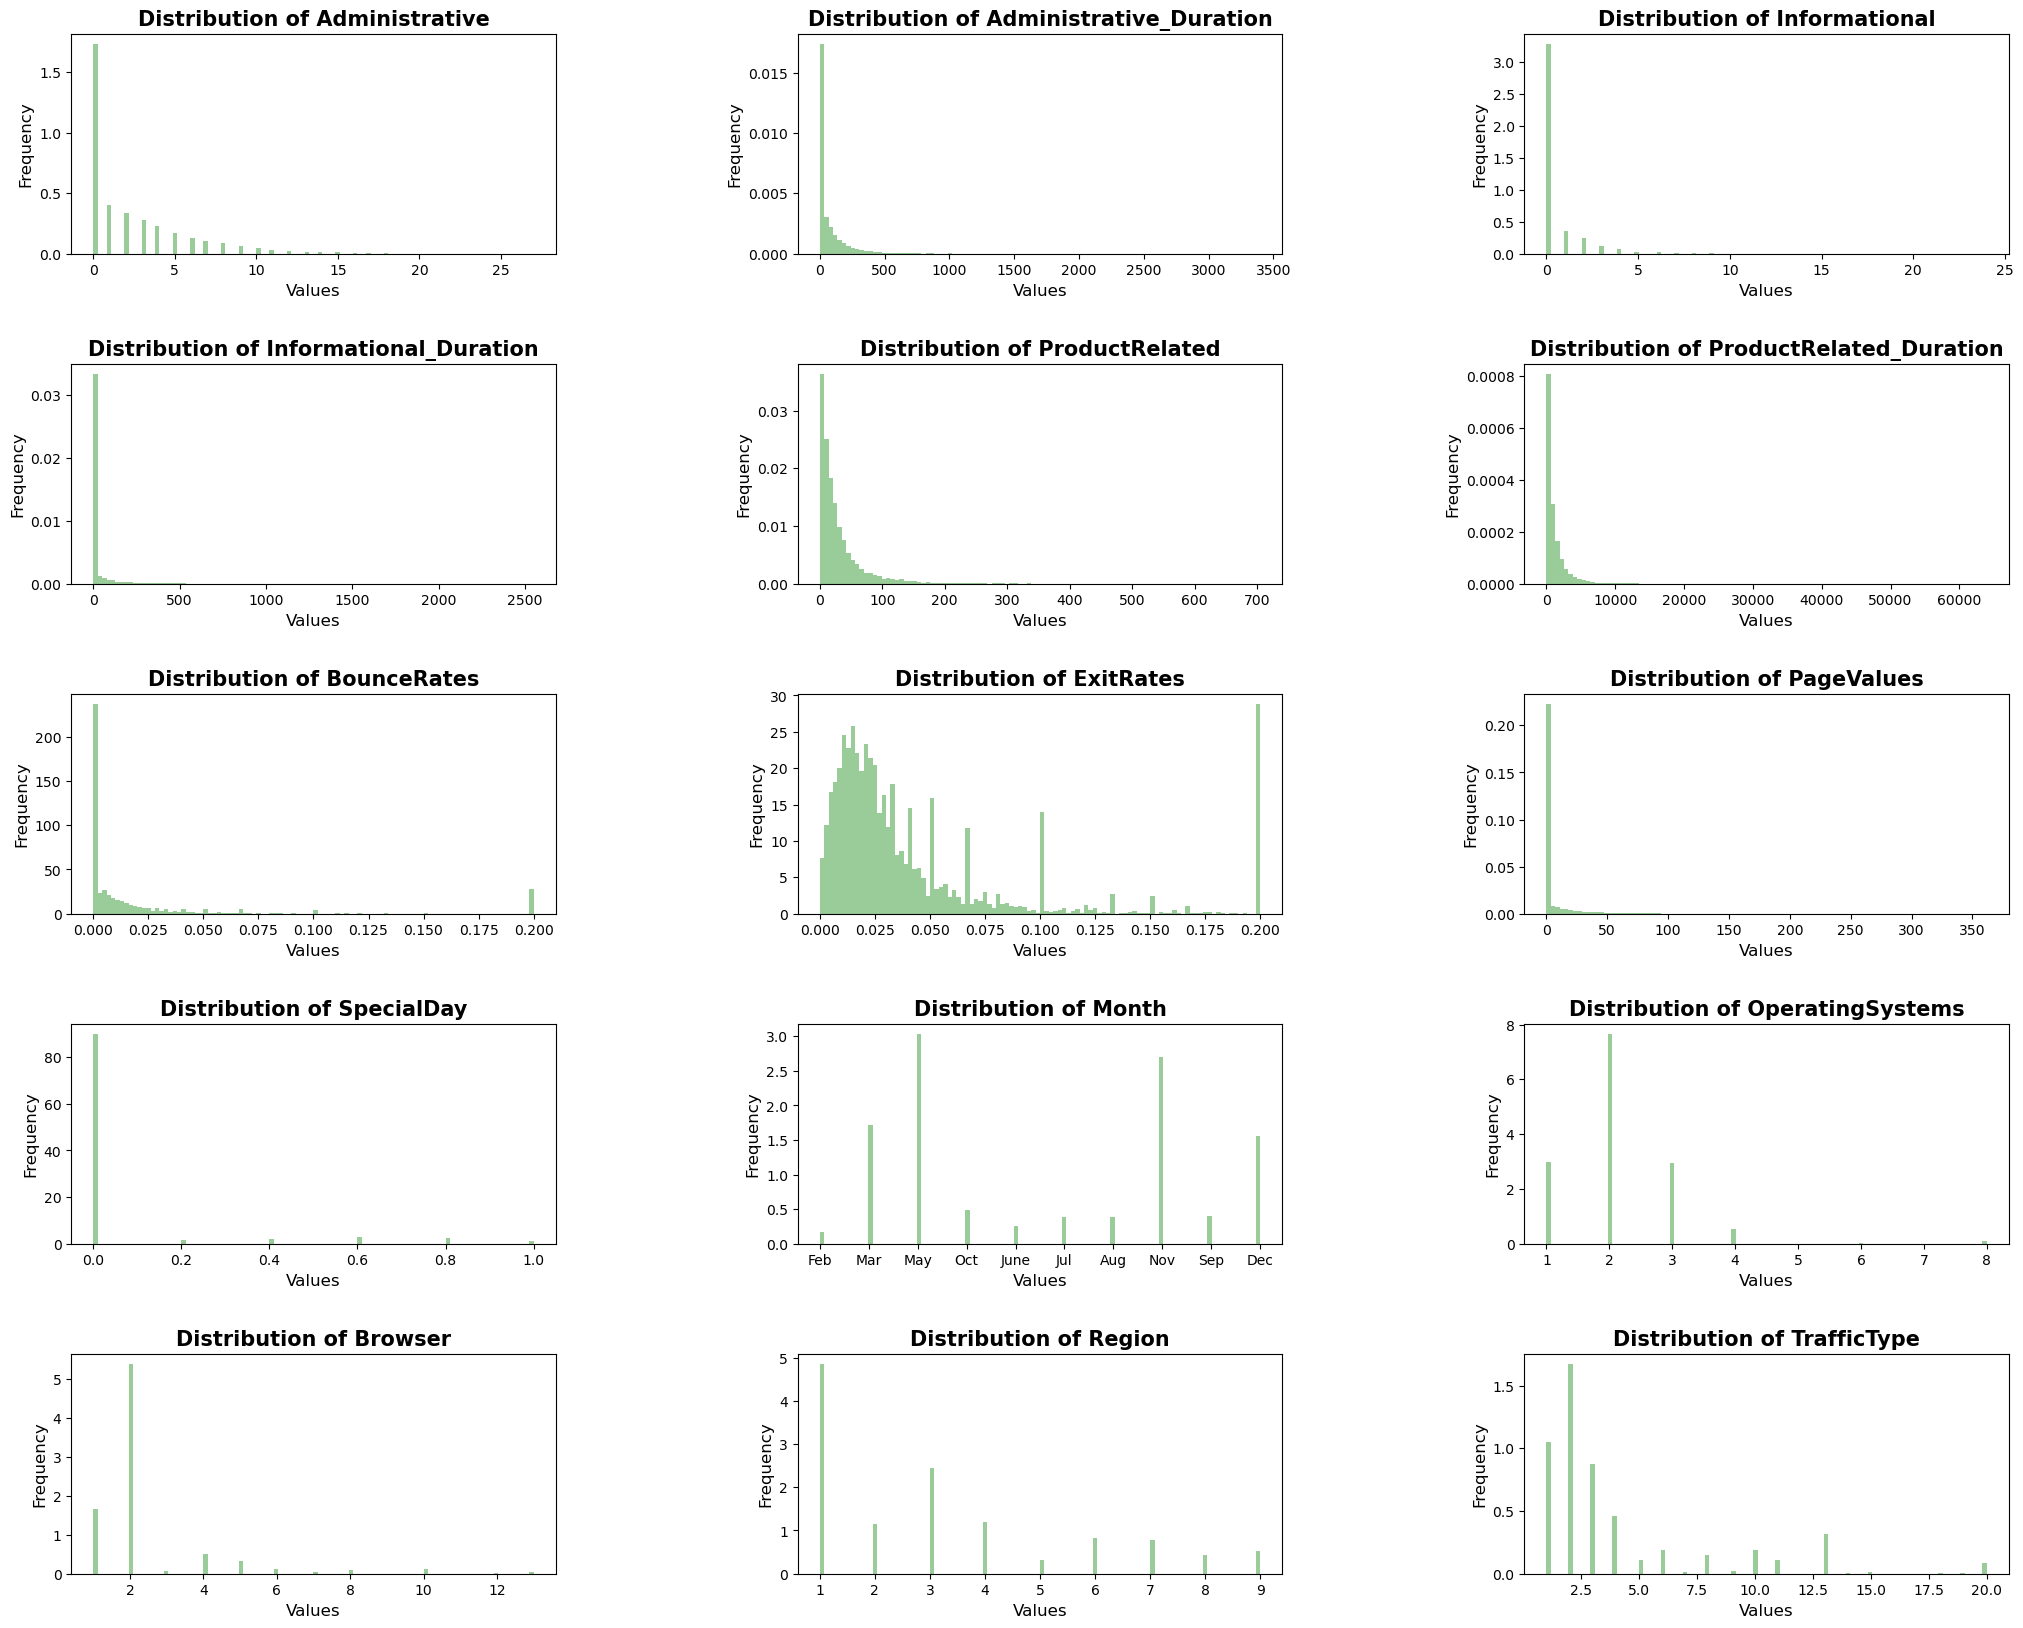

In [7]:
# Show the distribution plots of each variable using hist function from pandas+matplotlib. 
# Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression.
# You can change color, thickness, font, font size, font color, etc.). 
# Explain the plot distributions as much as you can.
# For example, you can describe the attributes of the distributions like “From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.” (0.5 x 2) 

fig, ax = plt.subplots(5,3,figsize = (25,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
col_array = g08_online_shopping_df.columns.values.reshape(6,3)
for i,row in enumerate(col_array[:-1]):
    for j, col in enumerate(row):
        ax[i,j].hist(g08_online_shopping_df[col],density=True, bins=100, alpha=0.4,color="Green");
        ax[i,j].set_title(f'Distribution of {col}', fontsize=15, weight = "bold")
        ax[i,j].set_xlabel('Values', fontsize=12)
        ax[i,j].set_ylabel('Frequency', fontsize=12)
plt.show()

# By analyzing the distribution plots, we can deduce that majority of the variables are skewed to the right, however, some of the variables have a gap between the bins which alludes to the fact that variables are categorical in nature.